# **Анализ и визуализация данных**

Загрузка библиотек для работы

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Описание данных:

**'status' — статус продажи;**

**'street' — адрес объекта недвижимости;**

**'baths' — количество ванных комнат;**

**'city' — город;**

**'sqft' — площадь в футах;**

**'zipcode' — почтовый индекс;**

**'state' — штат;**

**'target' — цена объекта недвижимости (целевой признак).**

**'pool' — наличие  бассейна;**

**'Type' — тип объекта недвижимости;**

**'Year built' - год постройки;**

**'Heating' - наличие отопления;**

**'Cooling' - наличие кондиционера;**

**'Parking' - наличие парковки/гаража;**

**'fireplace' - наличие камина;**

**'school_rating _mean'  средний рейтинг школ рядом;**

**'school_dist_min' - Минимальное растояние до школы;**

In [ ]:
realty_data_full = pd.read_csv('realty_data_full.csv')
display(realty_data_full.head())
realty_data_full.info()

,status,street,baths,fireplace,city,sqft,zipcode,state,target,Type,pool,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min
0,Active,240 Heather Ln,3.0,True,Southern Pines,2900.0,28387,NC,418000,single_family,False,2019,True,False,False,5.2,2.70
1,Active,12911 E Heroy Ave,3.0,False,Spokane Valley,1947.0,99216,WA,310000,single_family,False,2019,False,False,False,4.0,1.01
2,Active,2005 Westridge Rd,2.0,True,Los Angeles,3000.0,90049,CA,2895000,single_family,True,1961,True,True,True,6.7,1.19
3,Active,4311 Livingston Ave,8.0,True,Dallas,6457.0,75205,TX,2395000,single_family,False,2006,True,True,True,5.6,0.10
4,Active,1524 Kiscoe St,2.0,False,Palm Bay,0.0,32908,FL,5000,land,False,no date,False,False,False,4.7,3.03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369724 entries, 0 to 369723
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   status               369724 non-null  object 
 1   street               369724 non-null  object 
 2   baths                369724 non-null  float64
 3   fireplace            369724 non-null  bool   
 4   city                 369724 non-null  object 
 5   sqft                 369724 non-null  float64
 6   zipcode              369724 non-null  int64  
 7   state                369724 non-null  object 
 8   target               369724 non-null  int64  
 9   Type                 369724 non-null  object 
 10  pool                 369724 non-null  bool   
 11  Year built           369724 non-null  object 
 12  Heating              369724 non-null  bool   
 13  Cooling              369724 non-null  bool   
 14  Parking              369724 non-null  bool   
 15  school_rating _me

Изменим тип почтового индекса,так как он указывает на район объекта недвижимости.

In [ ]:
realty_data_full['zipcode'] = realty_data_full['zipcode'].astype(str)

Удаляем колонку с признаком street,так как он не являеся рещающим для нашей работы(слишком много уникальных значений)

In [ ]:
realty_data_full = realty_data_full.drop('street', axis=1)

Удостоверимся,что в наших данных нет пропущенных значений с помощью тепловой карты.

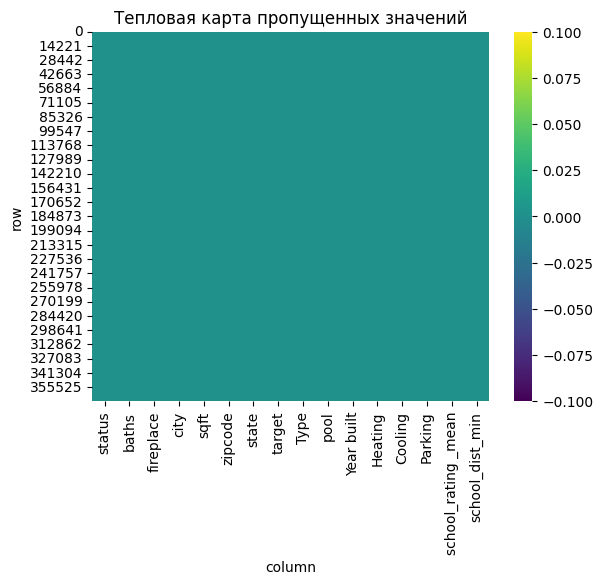

In [ ]:
# Создаем тепловую карту пропущенных значений
sns.heatmap(realty_data_full.isnull(), cbar=True, cmap='viridis')

# Устанавливаем метки осей
plt.xlabel('column')
plt.ylabel('row')

plt.title('Тепловая карта пропущенных значений')
plt.show()

In [ ]:
bool_features = ['pool','Heating','Cooling','Parking','fireplace']

cat_features = ['status','city','zipcode','state','Type','Year built']

num_features = ['baths', 'sqft', 'target', 'school_rating _mean', 'school_dist_min']

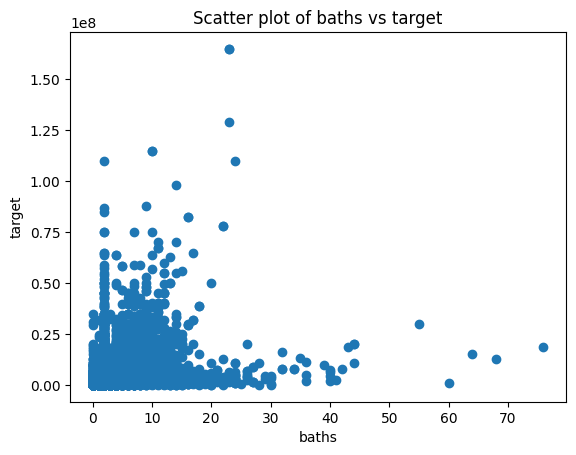

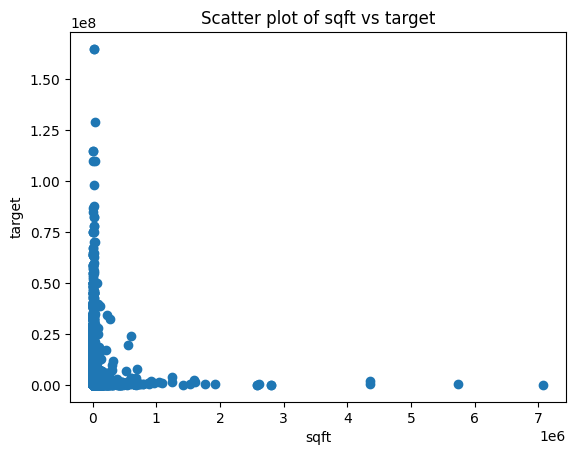

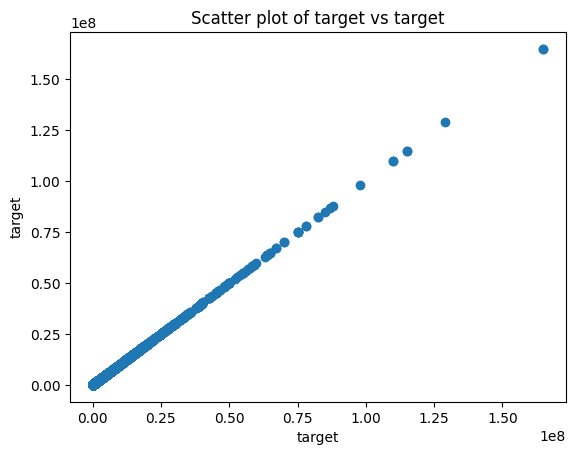

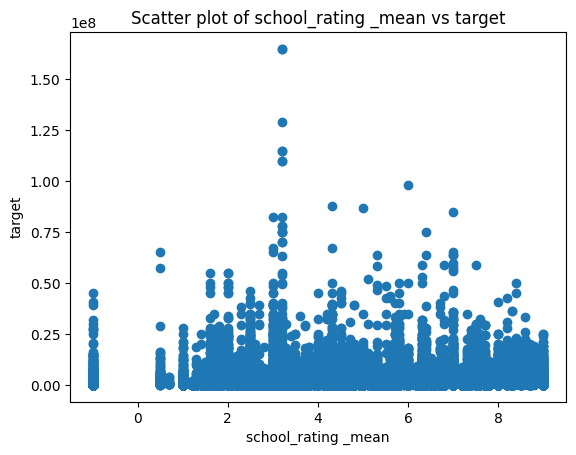

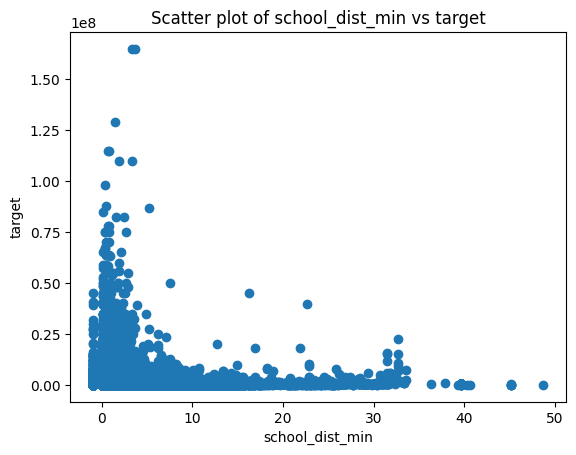

In [ ]:
for feature in num_features:
    plt.scatter(realty_data_full[feature], realty_data_full['target'])
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(f'Scatter plot of {feature} vs target')
    plt.show()

Есть выбросы в признаке baths - более 50 ванных комнат(такая недвижимость сущесвует на рынке, но в виде многоквартирного дома)

Также есть выброс в признаке sqft, где за копейки продается огромная территория.

И в признаке school_dist_min, где расстояние до учебного заведения более 200.

In [ ]:
emission_conditions = (realty_data_full['baths']> 50)
on_data = realty_data_full[emission_conditions]
display(on_data)

num_emission_conditions = len(on_data)

print(num_emission_conditions)

,status,baths,fireplace,city,sqft,zipcode,state,target,Type,pool,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min
78591,Active,76.0,False,Bayside,31000.0,11361,NY,18500000,multi_family,False,2016,False,True,False,3.8,0.07
108316,Active,55.0,False,Boston,30500.0,2215,MA,30000000,multi_family,False,1910,True,True,True,2.5,0.20
202736,Active,64.0,False,Anaheim,39514.0,92806,CA,15350000,multi_family,False,1973,True,True,True,7.7,1.90
301229,Active,60.0,False,Detroit,18192.0,48227,MI,900000,multi_family,False,1965,True,False,False,3.1,0.34
333676,Active,68.0,False,Sunland,37394.0,91040,CA,12800000,multi_family,False,1983,False,False,True,5.7,0.82


5


Наше предположение оказалось верным.Большое количество ванных комнат имеют многоквартирные дома,также они имеют высокую цену. Поэтому строчки не удаляем.

In [ ]:
emission_conditions1 =(realty_data_full['sqft']> 400000000)
on_data = realty_data_full[emission_conditions1]
display(on_data)

num_emission_conditions1 = len(on_data)

print(num_emission_conditions1)

,status,baths,fireplace,city,sqft,zipcode,state,target,Type,pool,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min


0


После исследования сайтов недвижимости можно сказать,что подобные объекты встречаются почти никогда и служат для поиска инвесторов или покупателей земли при застройке нового района.

In [ ]:
# Удаляем Выбросы, соответствующие условию
realty_data_full.drop(realty_data_full[emission_conditions1].index, inplace=True)

In [ ]:
emission_conditions2 =(realty_data_full['sqft'] == 0) & (realty_data_full['target']> 1000000) & ((realty_data_full['Type'] != 'land')&(realty_data_full['Type'] != 'other'))
on_data = realty_data_full[emission_conditions2]
display(on_data)

num_emission_conditions = len(on_data)

print(num_emission_conditions)

,status,baths,fireplace,city,sqft,zipcode,state,target,Type,pool,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min


0


Удаляем объекты,которые не являются земельным участком или чем-то подобным, так как у них может быть нулевой признак sqft.

In [ ]:
# Удаляем Выбросы, соответствующие условию
realty_data_full.drop(realty_data_full[emission_conditions2].index, inplace=True)

In [ ]:
emission_conditions3 = (realty_data_full['school_dist_min']> 100)
on_data = realty_data_full[emission_conditions3]
display(on_data)

num_emission_conditions = len(on_data)

print(num_emission_conditions)

,status,baths,fireplace,city,sqft,zipcode,state,target,Type,pool,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min


0


In [ ]:
# Удаляем Выбросы, соответствующие условию
realty_data_full.drop(realty_data_full[emission_conditions3].index, inplace=True)

Проверяем на мультиколлинеарность и корреляцию числовых признаков между собой и признаком "target":

Ранг матрицы : 10
Определитель матрицы : 0.2586723


<Axes: >

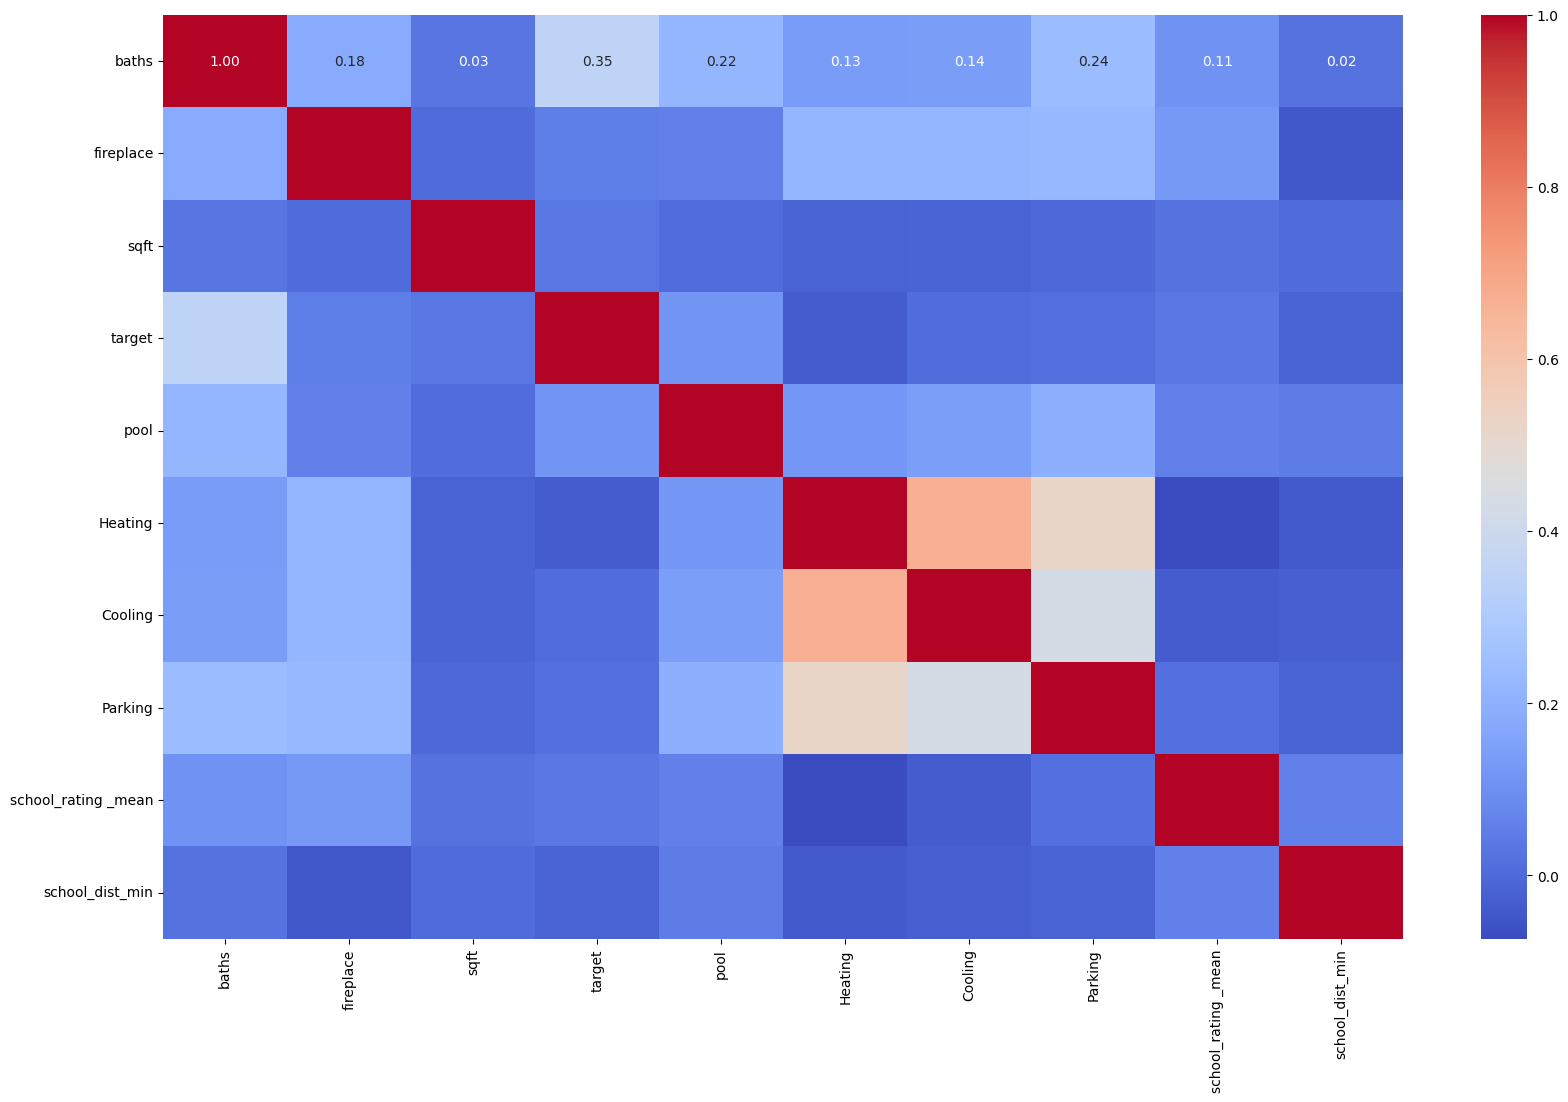

In [ ]:
correlation_matrix = realty_data_full.corr(numeric_only=True)
print('Ранг матрицы :', np.linalg.matrix_rank(correlation_matrix))
print('Определитель матрицы : {:.7f}'.format(np.linalg.det(correlation_matrix)))

plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Распределение стоймости квартир в зависимости от значения категориальных и булевых переменных.

In [ ]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='target',
                data=realty_data_full.loc[realty_data_full.loc[:, column].isin(realty_data_full.loc[:, column].value_counts().index[:15])],
               ax=ax)
    plt.xticks(rotation=10)
    ax.set_title('Boxplot for ' + column)
    plt.show()

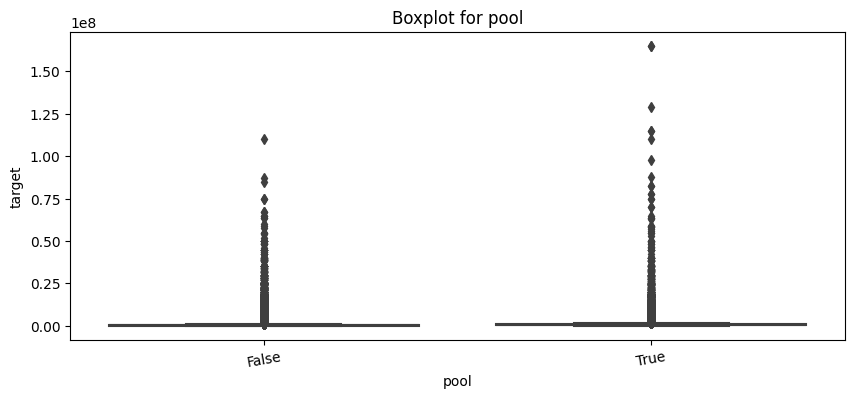

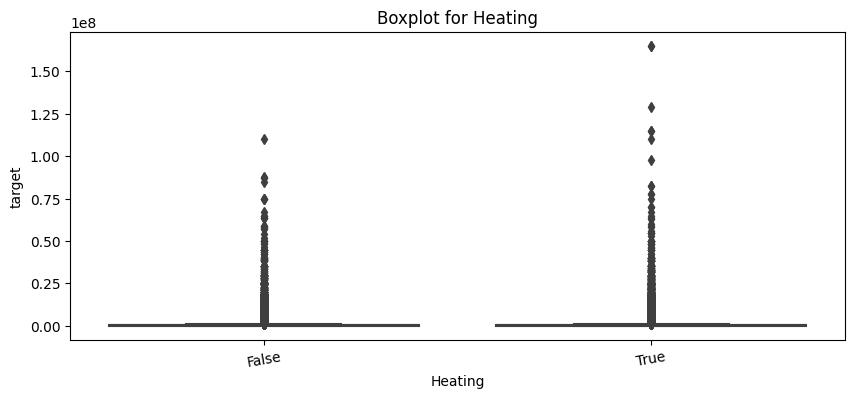

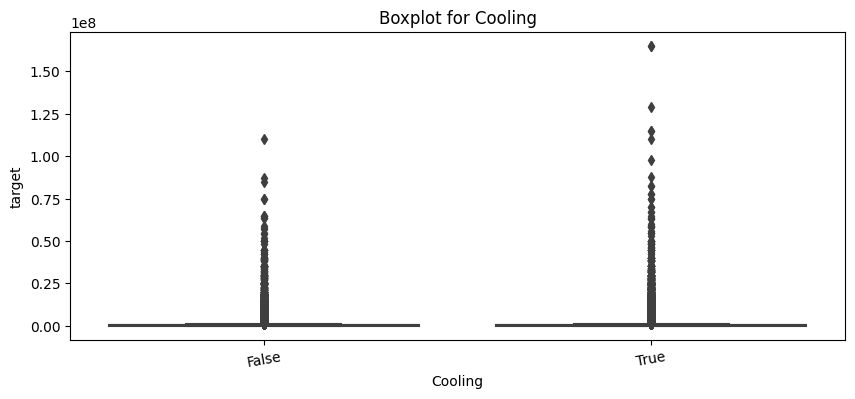

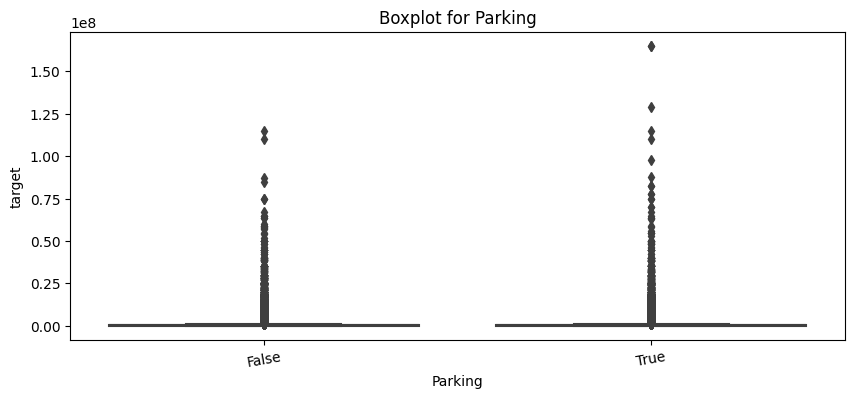

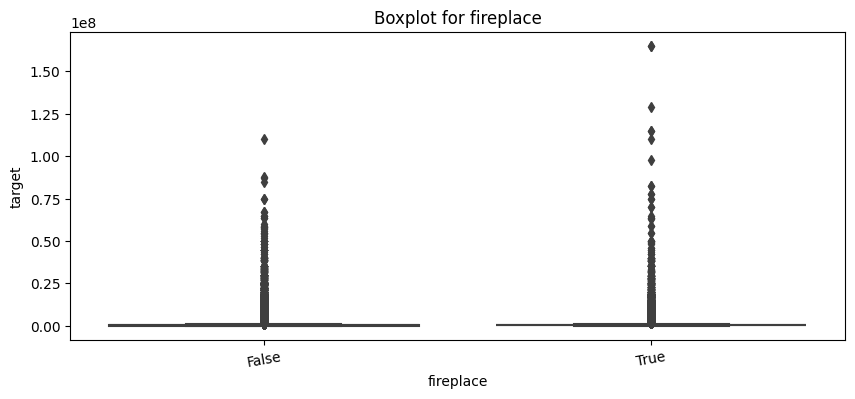

In [ ]:
for col in bool_features:
    get_boxplot(col)

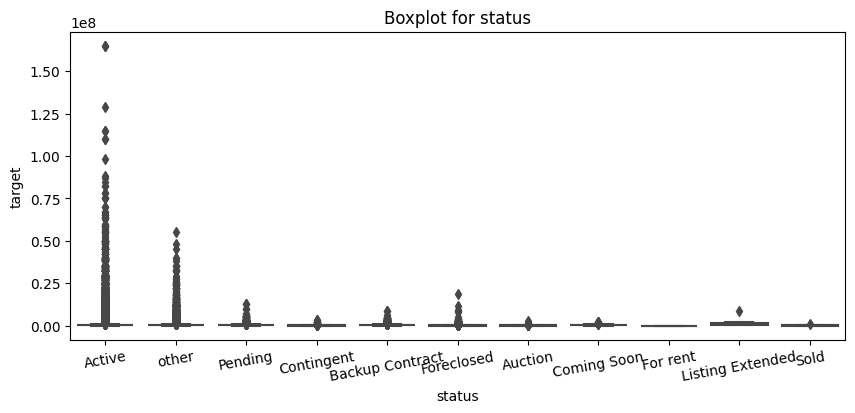

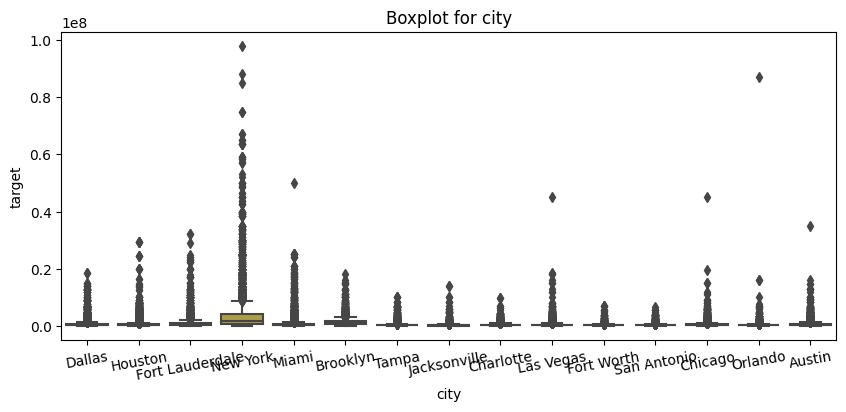

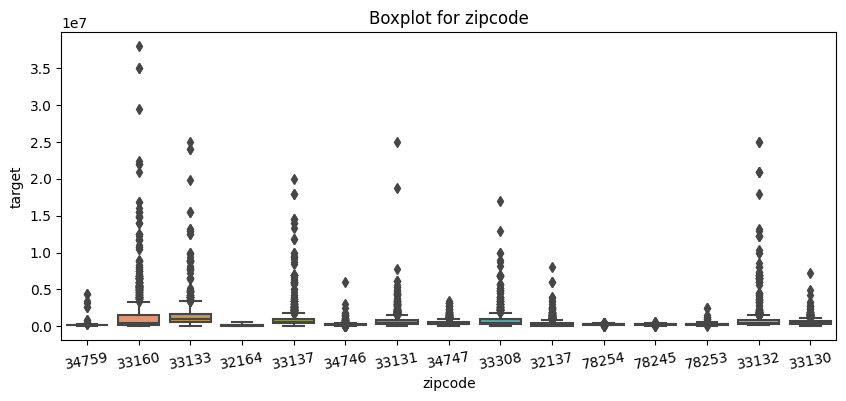

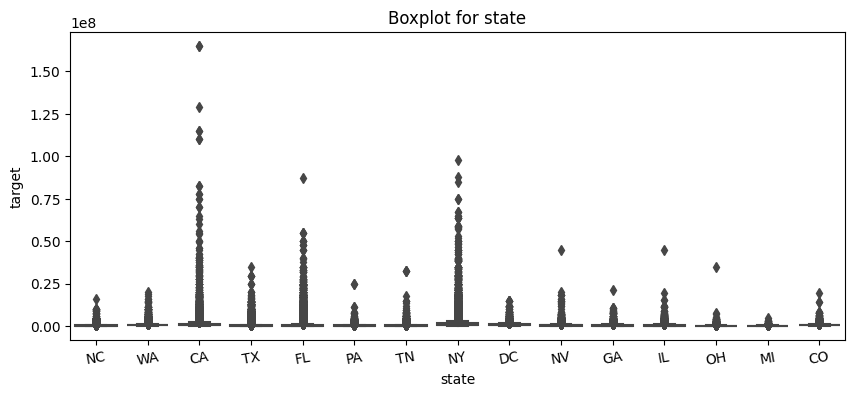

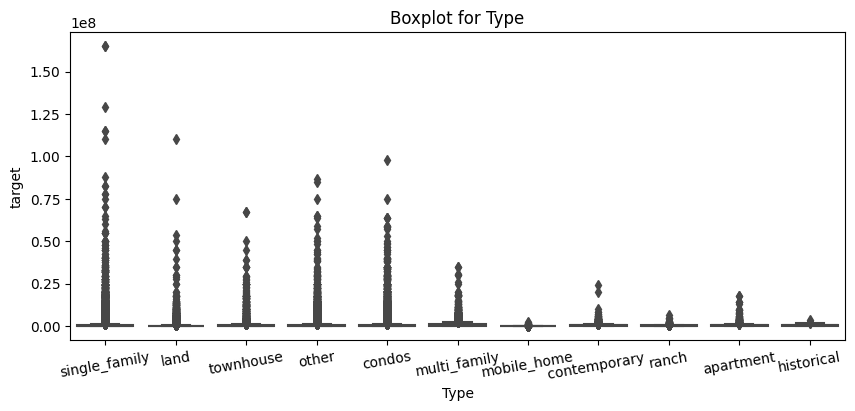

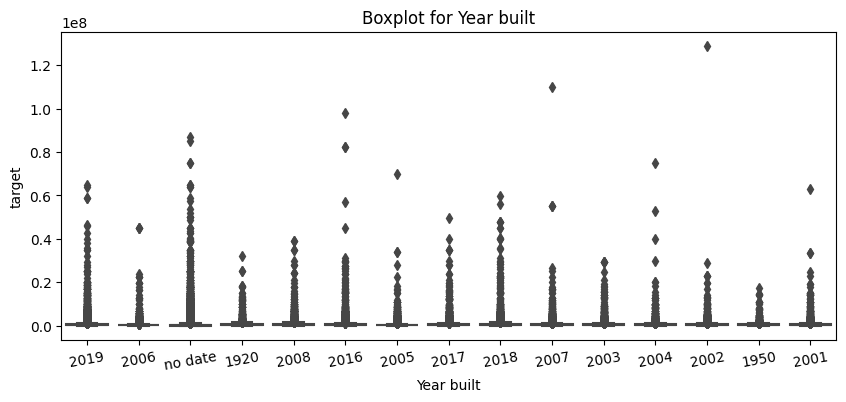

In [ ]:
for col in cat_features:
    get_boxplot(col)

Highest Price $1,781,941.96 in NY
Lowest Price $50,000.00 in OT


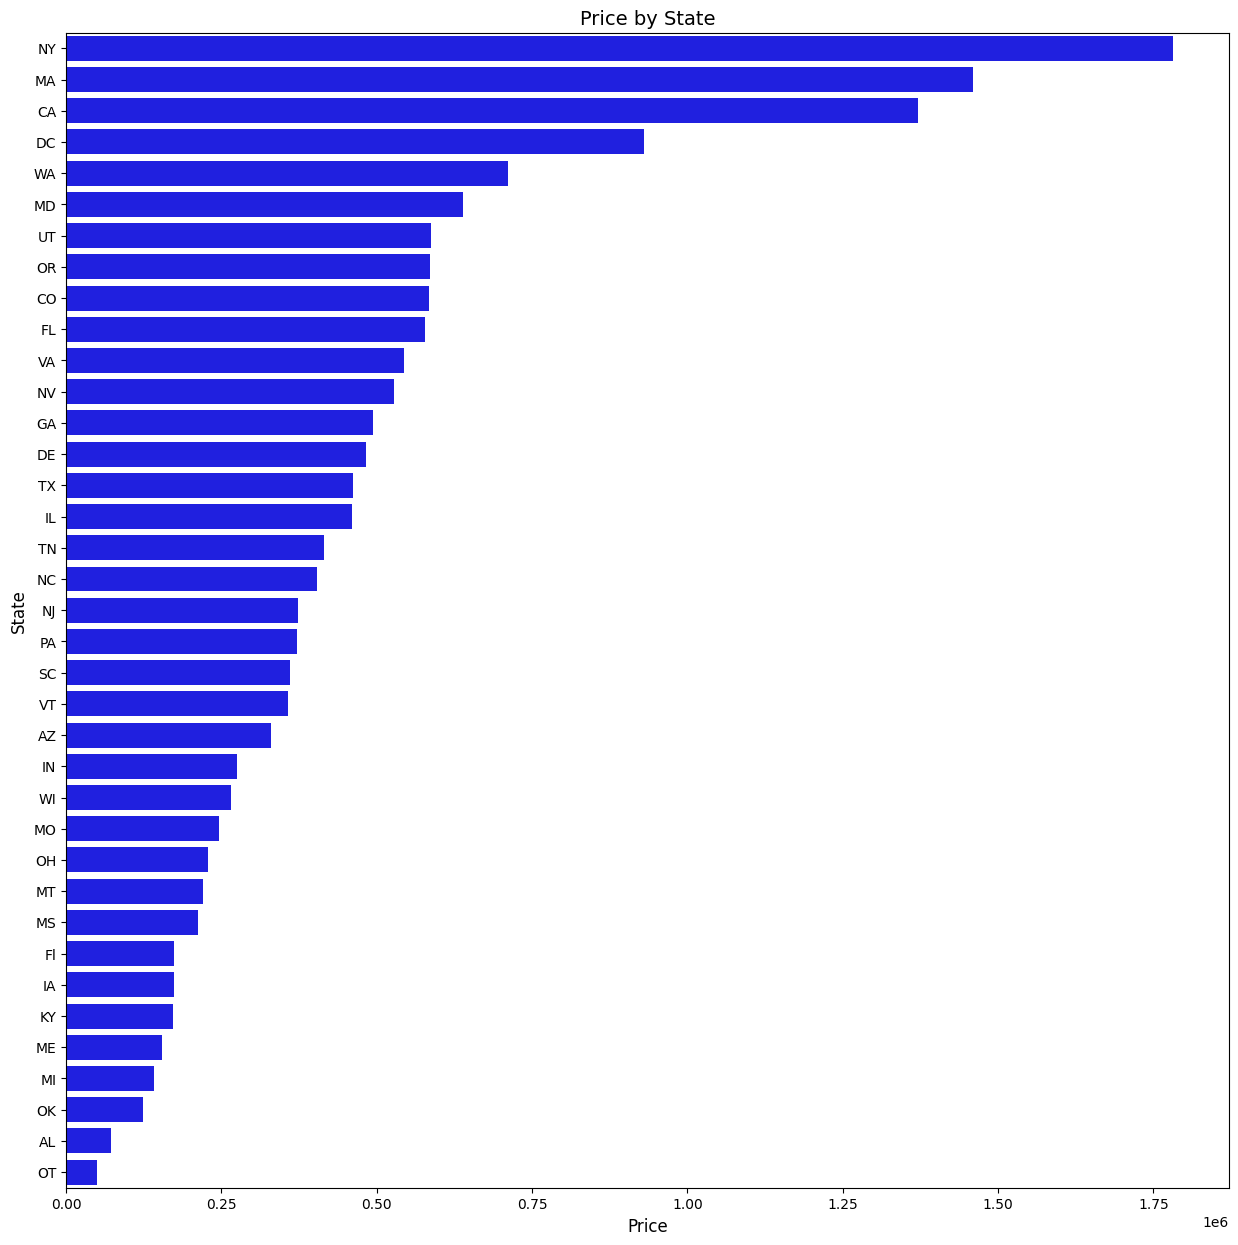

In [ ]:
states = realty_data_full.groupby(realty_data_full['state'])['target'].mean().dropna().sort_values(ascending=False).index
values = realty_data_full.groupby(realty_data_full['state'])['target'].mean().dropna().sort_values(ascending=False).values
plt.figure(figsize=(15, 15))
sns.barplot(y=states, x=values, color='blue')
plt.title('Price by State', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('State', fontsize=12)
print('Highest Price ${:,.2f} in {}'.format(round(values[0], 2), states[0]))
print('Lowest Price ${:,.2f} in {}'.format(round(values[-1], 2), states[-1]))

Из данного барплота мы видим,что самая большая стоимость у недвижимости из Нью-Йорка

Highest Price $940,507.94 in NY
Lowest Price $124,678.01 in OT


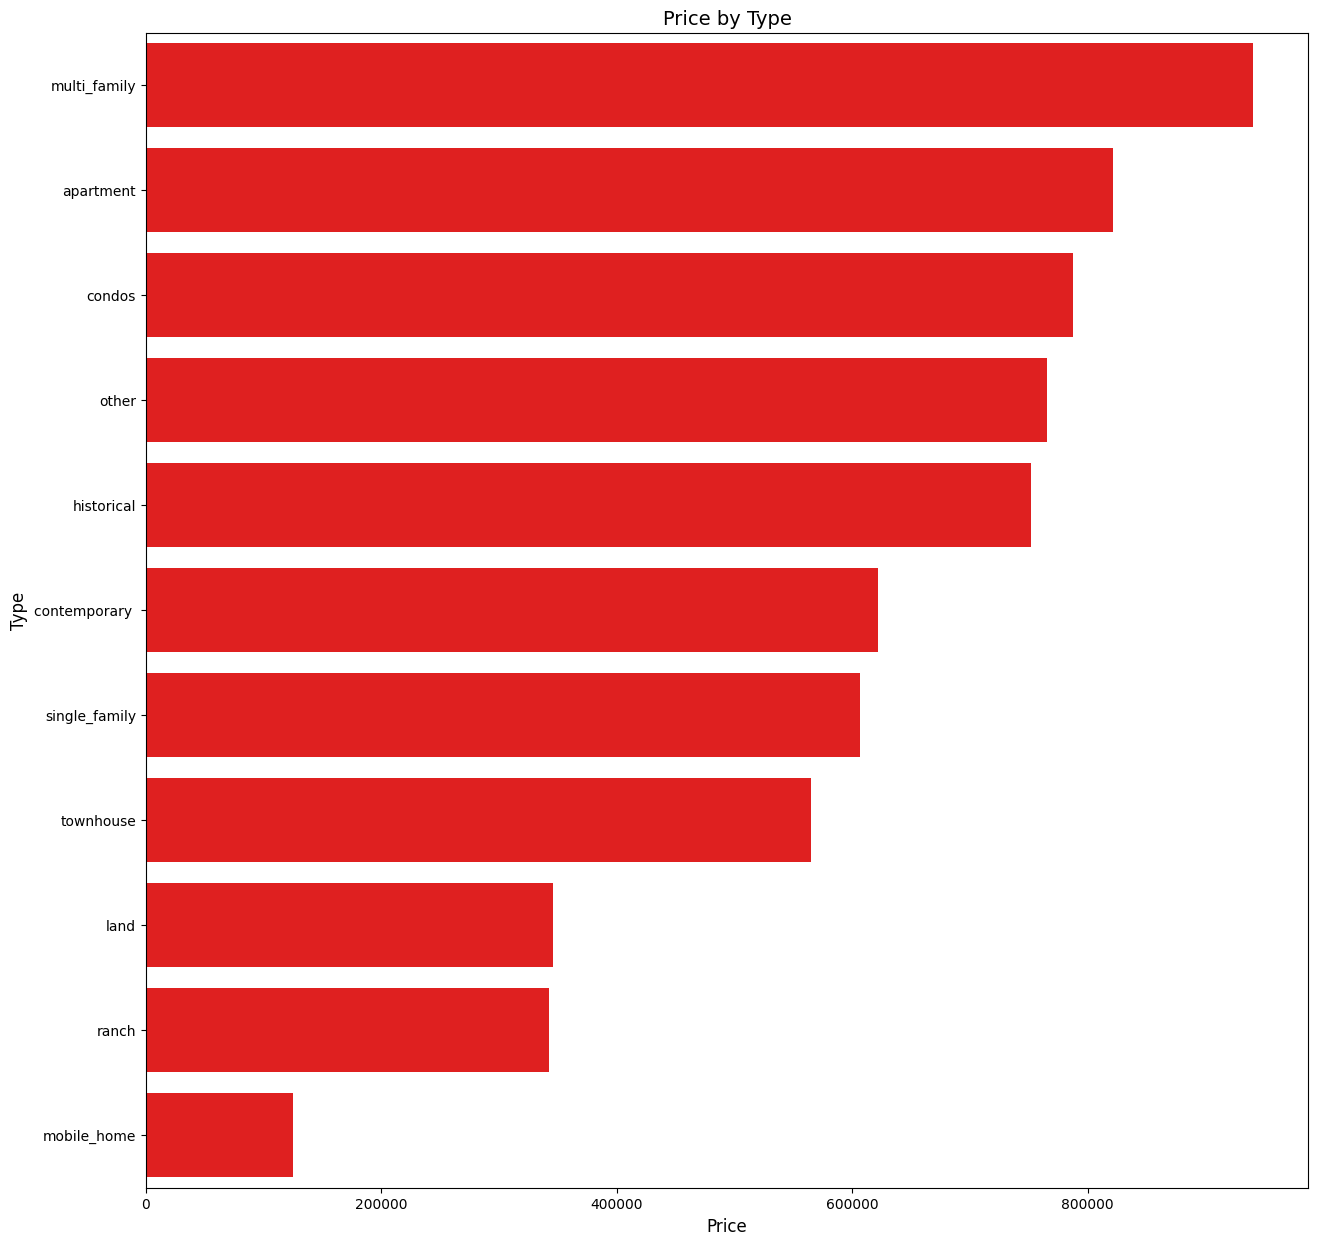

In [ ]:
types = realty_data_full.groupby(realty_data_full['Type'])['target'].mean().dropna().sort_values(ascending=False).index
values = realty_data_full.groupby(realty_data_full['Type'])['target'].mean().dropna().sort_values(ascending=False).values
plt.figure(figsize=(15, 15))
sns.barplot(y=types, x=values, color='red')
plt.title('Price by Type', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Type', fontsize=12)
print('Highest Price ${:,.2f} in {}'.format(round(values[0], 2), states[0]))
print('Lowest Price ${:,.2f} in {}'.format(round(values[-1], 2), states[-1]))

In [ ]:
def processing_data(data):
    df_out = realty_data_full.copy()

    # Нормализация и логарифмирование данных
    for column in ['baths', 'sqft', 'target', 'school_rating _mean', 'school_dist_min']:
        df_out[column] = df_out[column].apply(lambda x: abs(x))
        constant = 1e-6
        df_out[column] = np.log(df_out[column] + constant)
    #One-Hot Encoding (OHE) для категориальных признаков
    ohe_status = OneHotEncoder(sparse=False)
    ohe_state = OneHotEncoder(sparse=False)
    ohe_Type = OneHotEncoder(sparse=False)

    status_ohe = ohe_status.fit_transform(df_out['status'].values.reshape(-1,1))
    state_ohe = ohe_state.fit_transform(df_out['state'].values.reshape(-1,1))
    Type_ohe = ohe_Type.fit_transform(df_out['Type'].values.reshape(-1,1))

    #Label Encoding (LE) для категориальных признаков:
    le = LabelEncoder()
    state_label = le.fit_transform(df_out['state'])

    year_le = LabelEncoder()
    year_ord = year_le.fit_transform(df_out['Year built'])

    city_le = LabelEncoder()
    city_label = city_le.fit_transform(df_out['city'])

    zip_le = LabelEncoder()
    zip_label = zip_le.fit_transform(df_out['zipcode'])

    # Добавление закодированных категориальных признаков
    df_out = df_out.join(pd.DataFrame(status_ohe, columns=['status_' + str(cat) for cat in ohe_status.categories_[0]]))
    df_out = df_out.join(pd.DataFrame(state_ohe, columns=['state_' + str(cat) for cat in ohe_state.categories_[0]]))
    df_out = df_out.join(pd.DataFrame(Type_ohe, columns=['Type_' + str(cat) for cat in ohe_Type.categories_[0]]))
    df_out['state_label'] = state_label
    df_out['year_ord'] = year_ord
    df_out['city_label'] = city_label
    df_out['zip_label'] = zip_label

    #Удаление исходных категориальных столбцов:
    df_out.drop(['status', 'state', 'Type', 'city', 'zipcode','Year built'], axis=1, inplace=True)

    return df_out

In [ ]:
realty_data_model = processing_data(realty_data_full)
realty_data_model.sample(5)

C:\Users\79960\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\79960\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\79960\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,baths,fireplace,sqft,target,pool,Heating,Cooling,Parking,school_rating _mean,school_dist_min,...,Type_mobile_home,Type_multi_family,Type_other,Type_ranch,Type_single_family,Type_townhouse,state_label,year_ord,city_label,zip_label
79415,1.386295e+00,False,7.615791,12.546074,False,False,False,False,1.504078,1.467875,...,0.0,0.0,0.0,0.0,1.0,0.0,20,219,279,803
161143,9.999995e-07,False,6.598509,11.396392,False,True,True,False,0.693148,-0.223142,...,0.0,0.0,0.0,0.0,1.0,0.0,6,147,1454,1285
128540,6.931477e-01,False,-13.815511,12.524526,False,False,False,False,1.435085,0.693148,...,0.0,0.0,0.0,0.0,0.0,0.0,30,219,807,1485
245945,1.098613e+00,False,7.319202,12.042965,True,True,True,True,1.386295,0.542325,...,0.0,0.0,0.0,0.0,0.0,1.0,6,201,799,990
10358,6.931477e-01,False,7.595387,12.759239,False,False,False,False,1.902108,0.357675,...,0.0,0.0,0.0,0.0,1.0,0.0,2,219,586,3759


In [ ]:
realty_data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367712 entries, 0 to 368715
Data columns (total 73 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   baths                    367712 non-null  float64
 1   fireplace                367712 non-null  bool   
 2   sqft                     367712 non-null  float64
 3   target                   367712 non-null  float64
 4   pool                     367712 non-null  bool   
 5   Heating                  367712 non-null  bool   
 6   Cooling                  367712 non-null  bool   
 7   Parking                  367712 non-null  bool   
 8   school_rating _mean      367712 non-null  float64
 9   school_dist_min          367712 non-null  float64
 10  status_Active            367712 non-null  float64
 11  status_Auction           367712 non-null  float64
 12  status_Backup Contract   367712 non-null  float64
 13  status_Coming Soon       367712 non-null  float64
 14  status_Co

Удалим строки с пропущенными значениями

In [ ]:
realty_data_model = realty_data_model.dropna()

Сохраняем датасет,на котором будут работать модели.

In [ ]:
realty_data_model.to_csv("realty_data_model.csv", index=False)